# Chapter 9: Nonparametric Tests

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Helper functions imported from textbook
def p_rtail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x > tstat, color='r') 
    plt.fill_between(x,y, where = x <= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist < tstat) / len(sampdist) 
    return pvalue 

def p_ltail(sampdist,tstat): 
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = x < tstat, color='r') 
    plt.fill_between(x,y, where = x >= tstat, color='g') 
    plt.show() 
    pvalue = np.sum(sampdist > tstat) / len(sampdist) 

    return pvalue 

def p_2tail(sampdist,tstat):
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() 
    hyp = np.mean(sampdist) 
    cutoff1 = hyp - np.abs(hyp - tstat) 
    cutoff2 = hyp + np.abs(hyp - tstat) 
    x = points[0] 
    y = points[1] 
    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r') 
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g') 
    plt.show() 
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist) 
    return pvalue 

1. Conduct a nonparametric test for the null hypothesis that the 75% percentile value of GMAT score is 600. 

In [3]:
#admission csv imported into the directory.
admissions = pd.read_csv("admission.csv")
admissions.head(5)

,GPA,GMAT,De
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [4]:
#1. State the Null hypothesis : 75% percentile is 600,
#Step 2: Describe the data generation process and the population. 
#Since the GMAT scores are numeric, we will assume they follow a normal distribution,

In [5]:
from scipy.stats import norm

norm.ppf(0.75)

0.6744897501960817

In [6]:
newm = 600 - (norm.ppf(0.75) * admissions.std()['GMAT']) 

print(newm) 



545.0140127979766


In [7]:
norm.ppf(q=0.75, loc = newm, scale = admissions.std()['GMAT']) 

600.0

In [8]:
#Step 3 :create a sampling distribution
np.random.seed(87654321) 

sampsize = len(admissions) 

def f1(): 
    s1 = np.random.choice([0,1], size=sampsize, replace=True, p= [.75,.25]) 
    return (sum(s1)/sampsize) 
sampdist = [f1() for _ in range(10000)] 



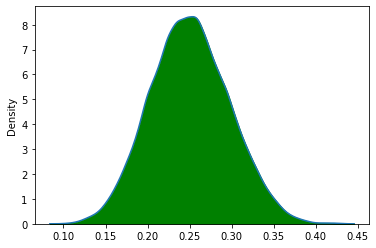

0.0

In [9]:
#create an actual sample
sign_gmat = np.where(admissions['GMAT']<600, 0, 1) 
dev_gmat = np.absolute(admissions['GMAT']-600) 

df = pd.DataFrame({'sign_gmat':sign_gmat, 'dev_gmat':dev_gmat}) 

df.sort_values('dev_gmat', inplace=True) 

df['rank_gmat'] = np.arange(1, len(df)+1) 

tstat = sum(df.loc[df['sign_gmat']==1]['rank_gmat']) 

p_2tail(sampdist, tstat) 

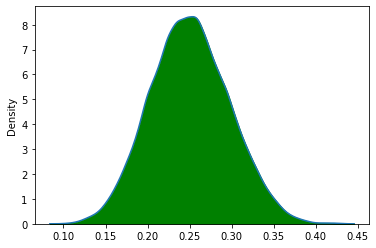

0.0

In [10]:
tstat = admissions.quantile(.75)['GMAT'] 

p_2tail(sampdist,tstat) 
#P-value is zero and we reject the null hypothesis

2. A customer complains to the owner of an independent fast-food restaurant that the restaurant is discriminating against the elderly. The customer claims that people 60 years old and older are given fewer french fries than people under 60. The owner responds by gathering data, collected without the knowledge of the employees so as not to affect their behavior. Here are data on the weight of french fries (grams) for the two groups of customers: 

Age less than 60: 75 77 80 69 73 76 78 74 75 81 75 80 79 80 

Age greater than 60: 68 74 77 71 73 75 80 77 78 72 69 71 75 78 

Conduct a nonparametric two-sample test to evaluate the complaint (i.e., whether the average weight is different in the two groups). 

In [11]:
data = {'under60': [75,77,80,69,73,76,78,74,75,81,75,80,79,80],
        'over60': [68,74,77,71,73,75,80,77,78,72,69,71,75,78]}
df = pd.DataFrame(data)

#under60 = [75,77,80,69,73,76,78,74,75,81,75,80,79,80]
#over60 = [68,74,77,71,73,75,80,77,78,72,69,71,75,78]

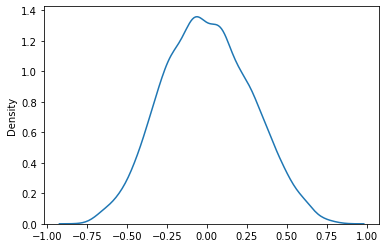

In [12]:
# null hypothesis : There is correlation between The age groups and grams of fries given
# Since there is no correlation, we can shuffle the vectors and find their correlation to create a sampling distribution.
# Create a sampling distribution.
from scipy.stats.stats import pearsonr 

 

np.random.seed(87654321) 

def f1(): 

    s1 = pd.DataFrame([df['under60'].sample(n=len(df))]).T
    s2 = pd.DataFrame([df['under60'].sample(n=len(df))]).T

    return (pearsonr(s1['under60'],s2['under60'])[0]) 

sampdist = [f1() for _ in range(10000)] 

sns.kdeplot(sampdist) 

plt.show() 

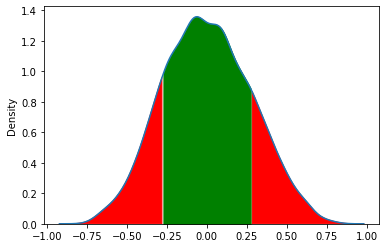

0.3282

In [13]:
tstat = pearsonr(df['under60'],df['over60'])[0] 

p_2tail(sampdist, tstat) 

In [14]:
#result : the p-value is very high, which means that the null hypotthesis cannot be rejected.
#there is a correlation, and the complaint is valid

3. Conduct a parametric and nonparametric test for the population median of price of 300. Which test is more reliable? 

In [15]:
#Real_estate.csvimported into the directory.
realestate = pd.read_csv("Real_estate.csv")
realestate.head(5)

,prices
0,142.0
1,175.0
2,197.5
3,149.4
4,705.0


In [16]:
#parametric test using built-in function
from scipy import stats

stats.ttest_1samp(realestate['prices'], 300) 
#high p value of 0.52

Ttest_1sampResult(statistic=0.6529659167225342, pvalue=0.5168303691945044)

In [17]:
#nonparametric test
from scipy.stats import wilcoxon

w, p = wilcoxon(realestate['prices']) 
print(w)
print(p)


0.0
7.555220876380673e-10


4. Conduct a nonparametric two-sample test for the hypothesis that the median value of Balance is the same for Blue Collar and White Collar customers.  



In [18]:
#import csv
customers = pd.read_csv("UK-Bank-Customers.csv")
customers.head(5)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [21]:
bluecollars = customers[customers['Job Classification']=='Blue Collar']
bluecollars.head(5)
median_bc = bluecollars['Balance'].median()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79
5,300000006,Ava,Coleman,Female,30,Wales,Blue Collar,09.Jan.15,122443.77
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.Jan.15,42879.84
13,100000019,William,Ince,Male,40,England,Blue Collar,15.Jan.15,65534.69


(107, 9)

In [22]:
whitecollars = customers[customers['Job Classification']=='White Collar']
whitecollars.head(5)
median_wc = whitecollars['Balance'].median()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
7,300000009,Ruth,Campbell,Female,33,Wales,White Collar,11.Jan.15,74284.35
8,100000010,Dominic,Parr,Male,42,England,White Collar,12.Jan.15,10912.45


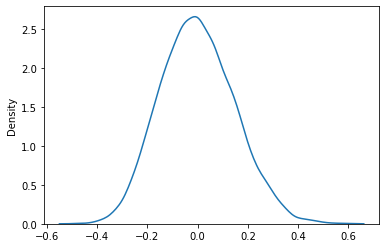

In [23]:
# null hypothesis : Median of Blue and White collar employees are the same
# Since there is no correlation, we can shuffle the vectors and find their correlation to create a sampling distribution.
# Create a sampling distribution.

np.random.seed(87654321) 

def f1(): 

    s1 = pd.DataFrame([bluecollars['Balance'].sample(n=len(bluecollars))]).T
    s2 = pd.DataFrame([bluecollars['Balance'].sample(n=len(bluecollars))]).T

    return (pearsonr(s1['Balance'],s2['Balance'])[0]) 

sampdist = [f1() for _ in range(10000)] 

sns.kdeplot(sampdist) 

plt.show() 

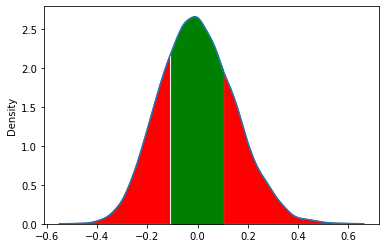

0.4807

In [29]:
tstat = pearsonr(bluecollars['Balance'],whitecollars['Balance'].sample(n=len(bluecollars)))[0] 

p_2tail(sampdist, tstat) 

In [30]:
#the p-value is too high above threshold, so it is rejected.

5. Use bootstrapping to create the 99% confidence interval for the median value of Balance for Female customers. 

In [20]:
female_customers = customers[customers.Gender=='Female']
female_customers.head(5)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79
5,300000006,Ava,Coleman,Female,30,Wales,Blue Collar,09.Jan.15,122443.77
6,100000007,Dorothy,Thomson,Female,34,England,Blue Collar,11.Jan.15,42879.84
7,300000009,Ruth,Campbell,Female,33,Wales,White Collar,11.Jan.15,74284.35


99% Confidence interval = [ 29387.84 ,  49096.15 ]


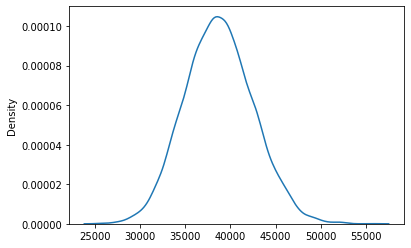

In [44]:
bootsampdist = [female_customers['Balance'].sample(n=len(female_customers), replace=True).mean() for _ in range(10000)]

q2 = np.quantile(bootsampdist, (.01/2, 1-(.01/2)))
sns.kdeplot(bootsampdist)
#plt.vlines(x=q2, ymin=0, ymax=0.08, color='r')
print("99% Confidence interval = [", np.round(q2,2)[0], ", ", np.round(q2,2)[1], "]")

Read the file Baseball.csv 

Use bootstrapping to create the 95% confidence interval for the interquartile range of the variable Average. The interquartile range is the difference between the 75% and 25% percentile values. 

In [41]:
#import csv
baseball = pd.read_csv("Baseball.csv")
baseball.head(5)

,Name,Salary,Average
0,Matt,9500000,0.269
1,jim,8000000,0.282
2,jim,7333333,0.327
3,fred,7250000,0.259
4,jermaine,7166667,0.240


99% Confidence interval = [ 0.25 ,  0.27 ]


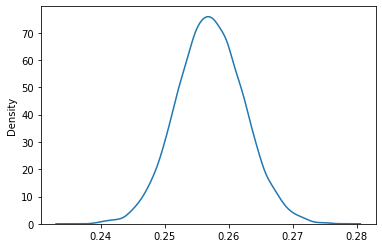

In [40]:
bootsampdist = [baseball['Average'].sample(n=len(baseball), replace=True).mean() for _ in range(10000)]

q2 = np.quantile(bootsampdist, (.05/2, 1-(.05/2)))
sns.kdeplot(bootsampdist)
plt.vlines(x=q2, ymin=0, ymax=0.08, color='r')
print("99% Confidence interval = [", np.round(q2,2)[0], ", ", np.round(q2,2)[1], "]")

Read the file Health.csv. 

7.There is a variable called faminc, which indicates the income of the family. Conduct a test for the median value of 1.75 using both parametric and nonparametric tests. 

8.There are two variables named males and ofp.  The second variable refers to the number of office visits made by the patients.  Conduct a non-parametric two sample test for the hypothesis that the mean of ofp is the same for both males and females. 

In [45]:
#import csv
health = pd.read_csv("Health.csv")
health.head(5)

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,west,age,black,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,6.9,1,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,7.4,0,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,6.6,1,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,7.6,0,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,7.9,0,0,1,6,0.6588,0,1,0


In [46]:
#question 7
#parametric test using built-in function
from scipy import stats

stats.ttest_1samp(health['faminc'], 1.75) 
#p value of 2.4836729458539627e-67

Ttest_1sampResult(statistic=17.63776362823923, pvalue=2.4836729458539627e-67)

In [48]:
#nonparametric test using built in function

w, p = wilcoxon(realestate['prices']) 
#print(w)
print(p)


7.555220876380673e-10
